In [156]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [157]:
df=pd.read_csv("CTG.csv")
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [158]:
df.isnull().sum()

FileName    3
Date        3
SegFile     3
b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

In [159]:
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [160]:
df.drop(['FileName', 'Date', 'SegFile', 'b', 'e', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP'], axis=1, inplace=True)


In [161]:
df.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [73]:
df['LB'] = df['LB'].fillna(df['LB'].mean())

In [75]:
df['AC'] = df['AC'].fillna(df['AC'].mean())

In [76]:
df['FM'] = df['LB'].fillna(df['FM'].mean())

In [77]:
df['UC'] = df['UC'].fillna(df['UC'].mean())

In [78]:
df['ASTV'] = df['ASTV'].fillna(df['ASTV'].mean())

In [79]:
df['MSTV'] = df['MSTV'].fillna(df['MSTV'].mean())

In [80]:
df['DL'] = df['DL'].fillna(df['DL'].mean())

In [81]:
df['DS'] = df['DS'].fillna(df['DS'].mean())

In [82]:
df['DP'] = df['DP'].fillna(df['DP'].mean())

In [83]:
df['DR'] = df['DR'].fillna(df['DR'].mean())

In [84]:
df['Width'] = df['Width'].fillna(df['Width'].mean())

In [85]:
df['Min'] = df['Min'].fillna(df['Min'].mean())

In [86]:
df['Max'] = df['Max'].fillna(df['Max'].mean())

In [87]:
df['Nmax'] = df['Nmax'].fillna(df['Nmax'].mean())

In [88]:
df['Nzeros'] = df['Nzeros'].fillna(df['Nzeros'].mean())

In [89]:
df['Mode'] = df['Mode'].fillna(df['Mode'].mean())

In [90]:
df['Mean'] = df['Mean'].fillna(df['Mean'].mean())

In [91]:
df['Median'] = df['Median'].fillna(df['Median'].mean())

In [92]:
df['Variance'] = df['Variance'].fillna(df['Variance'].mean())

In [94]:
df['Tendency'] = df['Tendency'].fillna(df['Tendency'].mean())

In [95]:
df['CLASS'] = df['CLASS'].fillna(df['CLASS'].mean())

In [96]:
df['NSP'] = df['NSP'].fillna(df['NSP'].mean())

In [162]:
scaler = StandardScaler()
df['LBE'] = scaler.fit_transform(df[['LBE']])

In [163]:
df.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,-1.352220,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,-0.132526,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,-0.030884,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,0.070757,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,-0.132526,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [164]:
df.columns

Index(['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL',
       'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'CLASS', 'NSP'],
      dtype='object')

In [165]:
df['LB'] = scaler.fit_transform(df[['LB']])

In [166]:
df['AC'] = scaler.fit_transform(df[['AC']])

In [167]:
df['FM'] = scaler.fit_transform(df[['FM']])

In [168]:
df['UC'] = scaler.fit_transform(df[['UC']])

In [169]:
df['ASTV'] = scaler.fit_transform(df[['ASTV']])

In [170]:
df['MSTV'] = scaler.fit_transform(df[['MSTV']])

In [171]:
df['DL'] = scaler.fit_transform(df[['DL']])

In [172]:
df['DS'] = scaler.fit_transform(df[['DS']])

In [173]:
df['DP'] = scaler.fit_transform(df[['DP']])

In [174]:
df['DR'] = scaler.fit_transform(df[['DR']])

In [175]:
df['Width'] = scaler.fit_transform(df[['Width']])

In [176]:
df['Min'] = scaler.fit_transform(df[['Min']])

In [177]:
df['Max'] = scaler.fit_transform(df[['Max']])

In [178]:
df['Nmax'] = scaler.fit_transform(df[['Nmax']])

In [179]:
df['Nzeros'] = scaler.fit_transform(df[['Nzeros']])

In [180]:
df['Mode'] = scaler.fit_transform(df[['Mode']])

In [181]:
df['Mean'] = scaler.fit_transform(df[['Mean']])

In [182]:
df['Median'] = scaler.fit_transform(df[['Median']])

In [183]:
df['Variance'] = scaler.fit_transform(df[['Variance']])

In [184]:
df['Tendency'] = scaler.fit_transform(df[['Tendency']])

In [185]:
df['CLASS'] = scaler.fit_transform(df[['CLASS']])

In [186]:
df['NSP'] = scaler.fit_transform(df[['NSP']])

In [187]:
df.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,-1.352220,-1.352220,-0.764740,-0.192281,-1.275527,1.510529,-0.937303,43.0,2.4,-0.626143,...,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980,1.483764,1.132589
1,-0.132526,-0.132526,0.358852,-0.192281,0.115065,-1.744036,0.857761,0.0,10.4,0.168390,...,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526,0.492412,-0.495460
2,-0.030884,-0.030884,-0.202944,-0.192281,0.462714,-1.802153,0.857761,0.0,13.4,0.168390,...,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526,0.492412,-0.495460
3,0.070757,0.070757,-0.202944,-0.192281,0.810362,-1.802153,1.194336,0.0,23.0,0.168390,...,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980,0.492412,-0.495460
4,-0.132526,-0.132526,0.358852,-0.192281,0.462714,-1.802153,1.194336,0.0,19.9,-0.626143,...,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980,-0.829391,-0.495460


In [188]:
x=df[['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL',
       'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'CLASS']]
y=df['NSP']

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [125]:
y=tf.keras.utils.to_categorical(y, num_classes=3)


In [136]:
model = models.Sequential([
    layers.Dense(units=30, activation='relu', input_shape=(24,)),
    layers.Dropout(0.3),
    layers.Dense(units=15, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=7, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=3, activation='softmax')  # Match with 3 classes
])


In [137]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [140]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)


In [ ]:

# Plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

yp=model.predict(x_test)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Check if the arrays are one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

if len(yp.shape) > 1 and yp.shape[1] > 1:
    yp = np.argmax(yp, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, yp)

# Visualize the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate the classification report
report = classification_report(y_test, yp)
print("Classification Report:")
print(report)

In [65]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Handle NaN values
y_train = y_train.fillna(0)  # Replace NaN with class 0

# Convert to integers (if y_train contains float values)
y_train = y_train.round().astype(int)

# Ensure valid class range
num_classes = 3
y_train = np.clip(y_train, 0, num_classes - 1)

# One-hot encode y_train
y_train = to_categorical(y_train, num_classes=num_classes)

# Verify the result
print("Shape of y_train after encoding:", y_train.shape)


Shape of y_train after encoding: (1703, 3)


In [67]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Verify the number of classes
print("Unique classes in y_train:", np.unique(y_train))

# Update the model
model = models.Sequential([
    layers.Dense(units=30, activation='relu', input_shape=(24,)),
    layers.Dropout(0.3),
    layers.Dense(units=15, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=3, activation='softmax')  # Match with number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Fit the model
history = model.fit(
    x_train, y_train,
    epochs=100, verbose=1,
    validation_split=0.2, batch_size=32,
    callbacks=[early_stopping]
)


Unique classes in y_train: [0. 1.]
Epoch 1/100


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5943 - loss: 2.1874 - val_accuracy: 0.8035 - val_loss: 1.0376
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7853 - loss: 1.0265 - val_accuracy: 0.8035 - val_loss: 0.9804
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7782 - loss: 0.9757 - val_accuracy: 0.8035 - val_loss: 0.9267
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7519 - loss: 0.9359 - val_accuracy: 0.8035 - val_loss: 0.8756
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7866 - loss: 0.8736 - val_accuracy: 0.8035 - val_loss: 0.8260
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7853 - loss: 0.8367 - val_accuracy: 0.8035 - val_loss: 0.7839
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7686 - loss: 0.8073 - val_accuracy: 0.8035 - val_loss: 0.7455
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7776 - loss: 0.7776 - val_accuracy: 0.8035 - val_loss: 0.7

In [155]:
import numpy as np

# Check the shape before reshaping
print("y_train shape before reshaping:", y_train.shape)

# Flatten the extra dimensions, if any, and make sure y_train is of shape (1241487, 3)
y_train = y_train.reshape(-1, 3)  # Flatten to shape (1241487, 3)

# Check the shape after reshaping
print("y_train shape after reshaping:", y_train.shape)

# If it's not already one-hot encoded, apply one-hot encoding
# We assume that the values are integers representing the class labels
# If y_train is still in integer form, convert to one-hot
if np.max(y_train) < 3:  # Check if the labels are in integer form
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)

# Check the final shape
print("y_train shape after encoding:", y_train.shape)

# Define the model (if not defined already)
model = models.Sequential([
    layers.Input(shape=(24,)),  # Using Input() for the first layer
    layers.Dense(units=30, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=15, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=3, activation='softmax')  # 3 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=100, verbose=1,
    validation_split=0.2, batch_size=32,
    callbacks=[early_stopping]
)


y_train shape before reshaping: (1241487, 3, 3)
y_train shape after reshaping: (3724461, 3)
y_train shape after encoding: (3724461, 3, 3)
Epoch 1/100


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 3, 3), output.shape=(None, 3)

In [149]:
#ACTIVATION FUNC

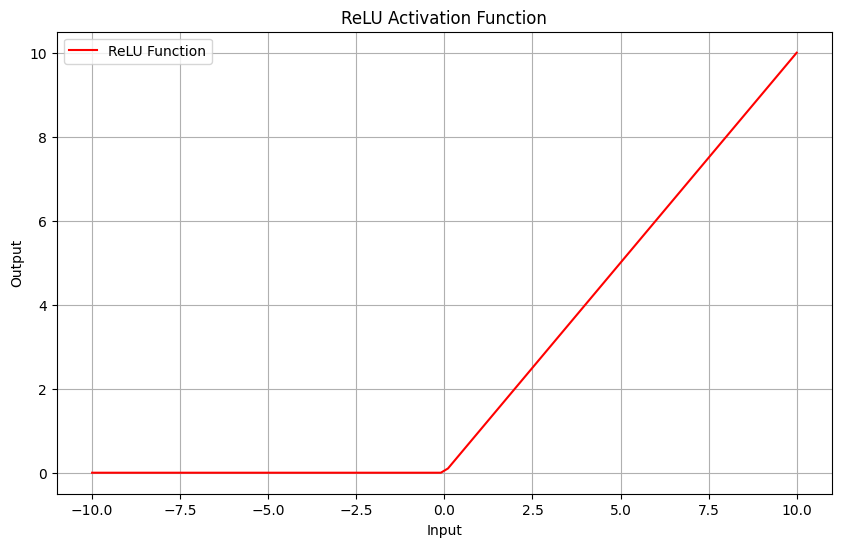

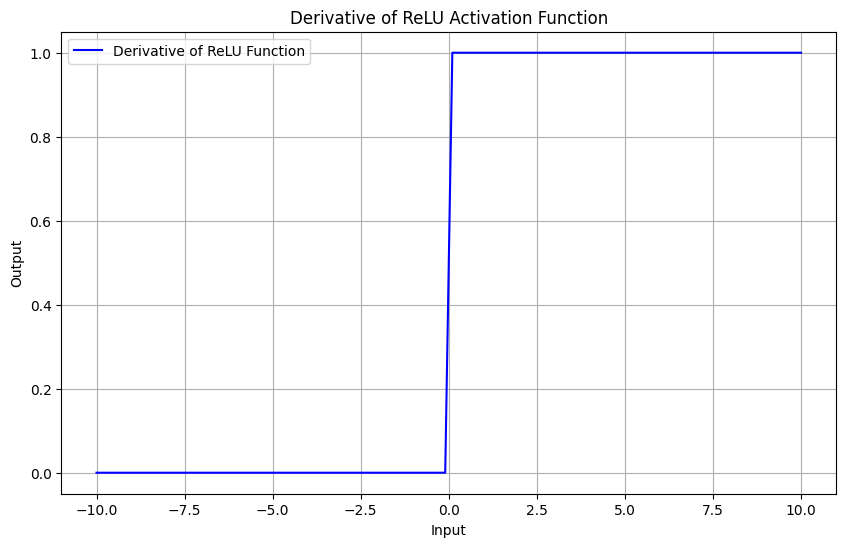

In [154]:
#RELU
import numpy as np
import matplotlib.pyplot as plt

# ReLU function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Generate input data
X = np.linspace(-10, 10, 100)
y = relu(X)
z = relu_derivative(X)

# Plot ReLU function
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='ReLU Function', color='red')
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()

# Plot derivative of ReLU
plt.figure(figsize=(10, 6))
plt.plot(X, z, label='Derivative of ReLU Function', color='blue')
plt.title('Derivative of ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()

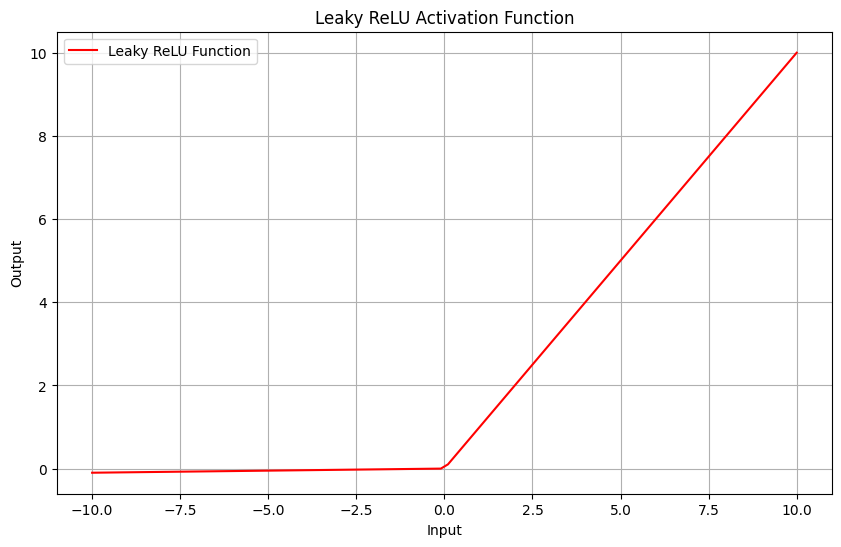

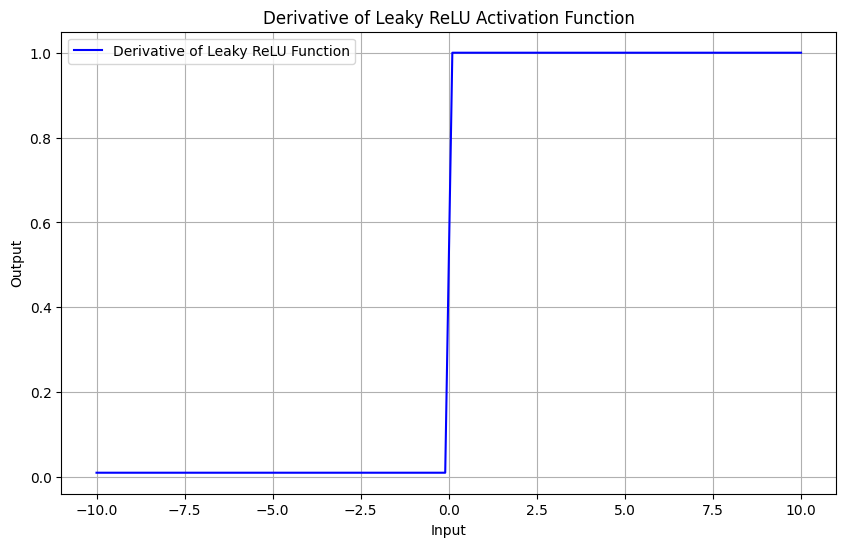

In [152]:
#LEAKY RELU
import numpy as np
import matplotlib.pyplot as plt

# Leaky ReLU function and its derivative
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Generate input data
X = np.linspace(-10, 10, 100)
y = leaky_relu(X)
z = leaky_relu_derivative(X)

# Plot Leaky ReLU function
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='Leaky ReLU Function', color='red')
plt.title('Leaky ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()

# Plot derivative of Leaky ReLU
plt.figure(figsize=(10, 6))
plt.plot(X, z, label='Derivative of Leaky ReLU Function', color='blue')
plt.title('Derivative of Leaky ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()